In [2]:
import os # For directory and file manipulation
import shutil # For high-level file operations like copying and removal
import pandas as pd # For data manipulation and analysis
from tqdm import tqdm # For displaying a progress bar
import rasterio # For working with raster data (e.g., satellite imagery)
from rasterio.plot import show # For displaying raster data
import numpy as np # For numerical operations on arrays
import matplotlib.pyplot as plt # For plotting data and images

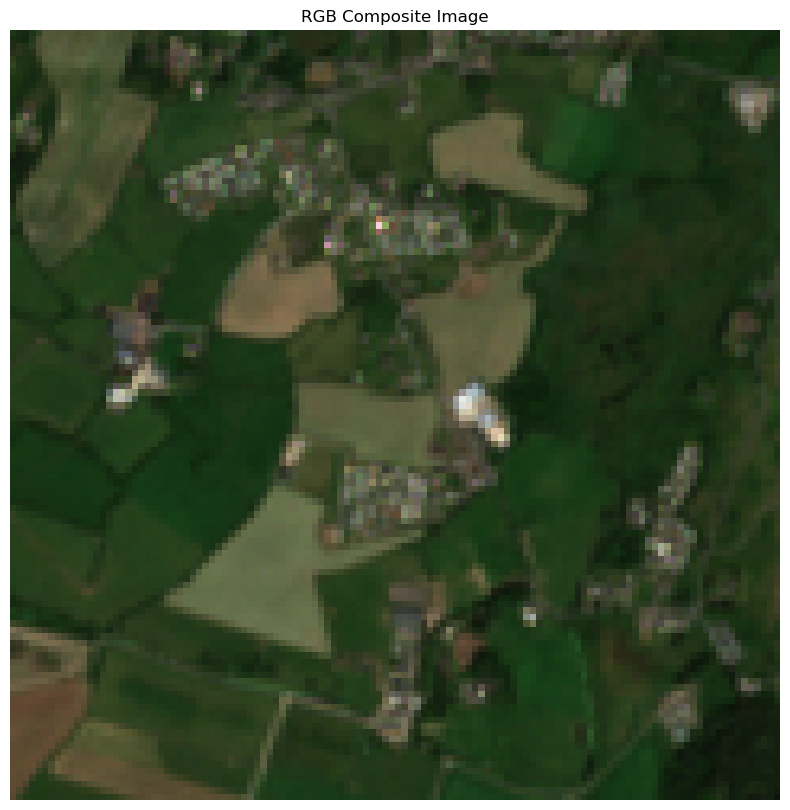

In [3]:
# File paths to the bands (modify these paths to your actual file locations)
band4_path = r'D:\datasets\2020-BigEarthNet-S2\BigEarthNetDataset\Beaches, dunes, sands\S2A_MSIL2A_20170617T113321_N9999_R080_T29UPU_65_77\S2A_MSIL2A_20170617T113321_N9999_R080_T29UPU_65_77_B04.tif'  # Red band
band3_path = r'D:\datasets\2020-BigEarthNet-S2\BigEarthNetDataset\Beaches, dunes, sands\S2A_MSIL2A_20170617T113321_N9999_R080_T29UPU_65_77\S2A_MSIL2A_20170617T113321_N9999_R080_T29UPU_65_77_B03.tif'
band2_path = r'D:\datasets\2020-BigEarthNet-S2\BigEarthNetDataset\Beaches, dunes, sands\S2A_MSIL2A_20170617T113321_N9999_R080_T29UPU_65_77\S2A_MSIL2A_20170617T113321_N9999_R080_T29UPU_65_77_B02.tif'

# Open the bands using Rasterio
with rasterio.open(band4_path) as band4, \
     rasterio.open(band3_path) as band3, \
     rasterio.open(band2_path) as band2:
    
    # Read each band into an array
    red = band4.read(1)
    green = band3.read(1)
    blue = band2.read(1)
    
    # Stack the bands to create an RGB image
    rgb = np.stack((red, green, blue), axis=-1)
    
    # Normalize the bands if necessary (optional)
    rgb = rgb / np.max(rgb)
    
    # Display the RGB image
    plt.figure(figsize=(10, 10))
    plt.imshow(rgb)
    plt.title("RGB Composite Image")
    plt.axis('off')
    plt.show()


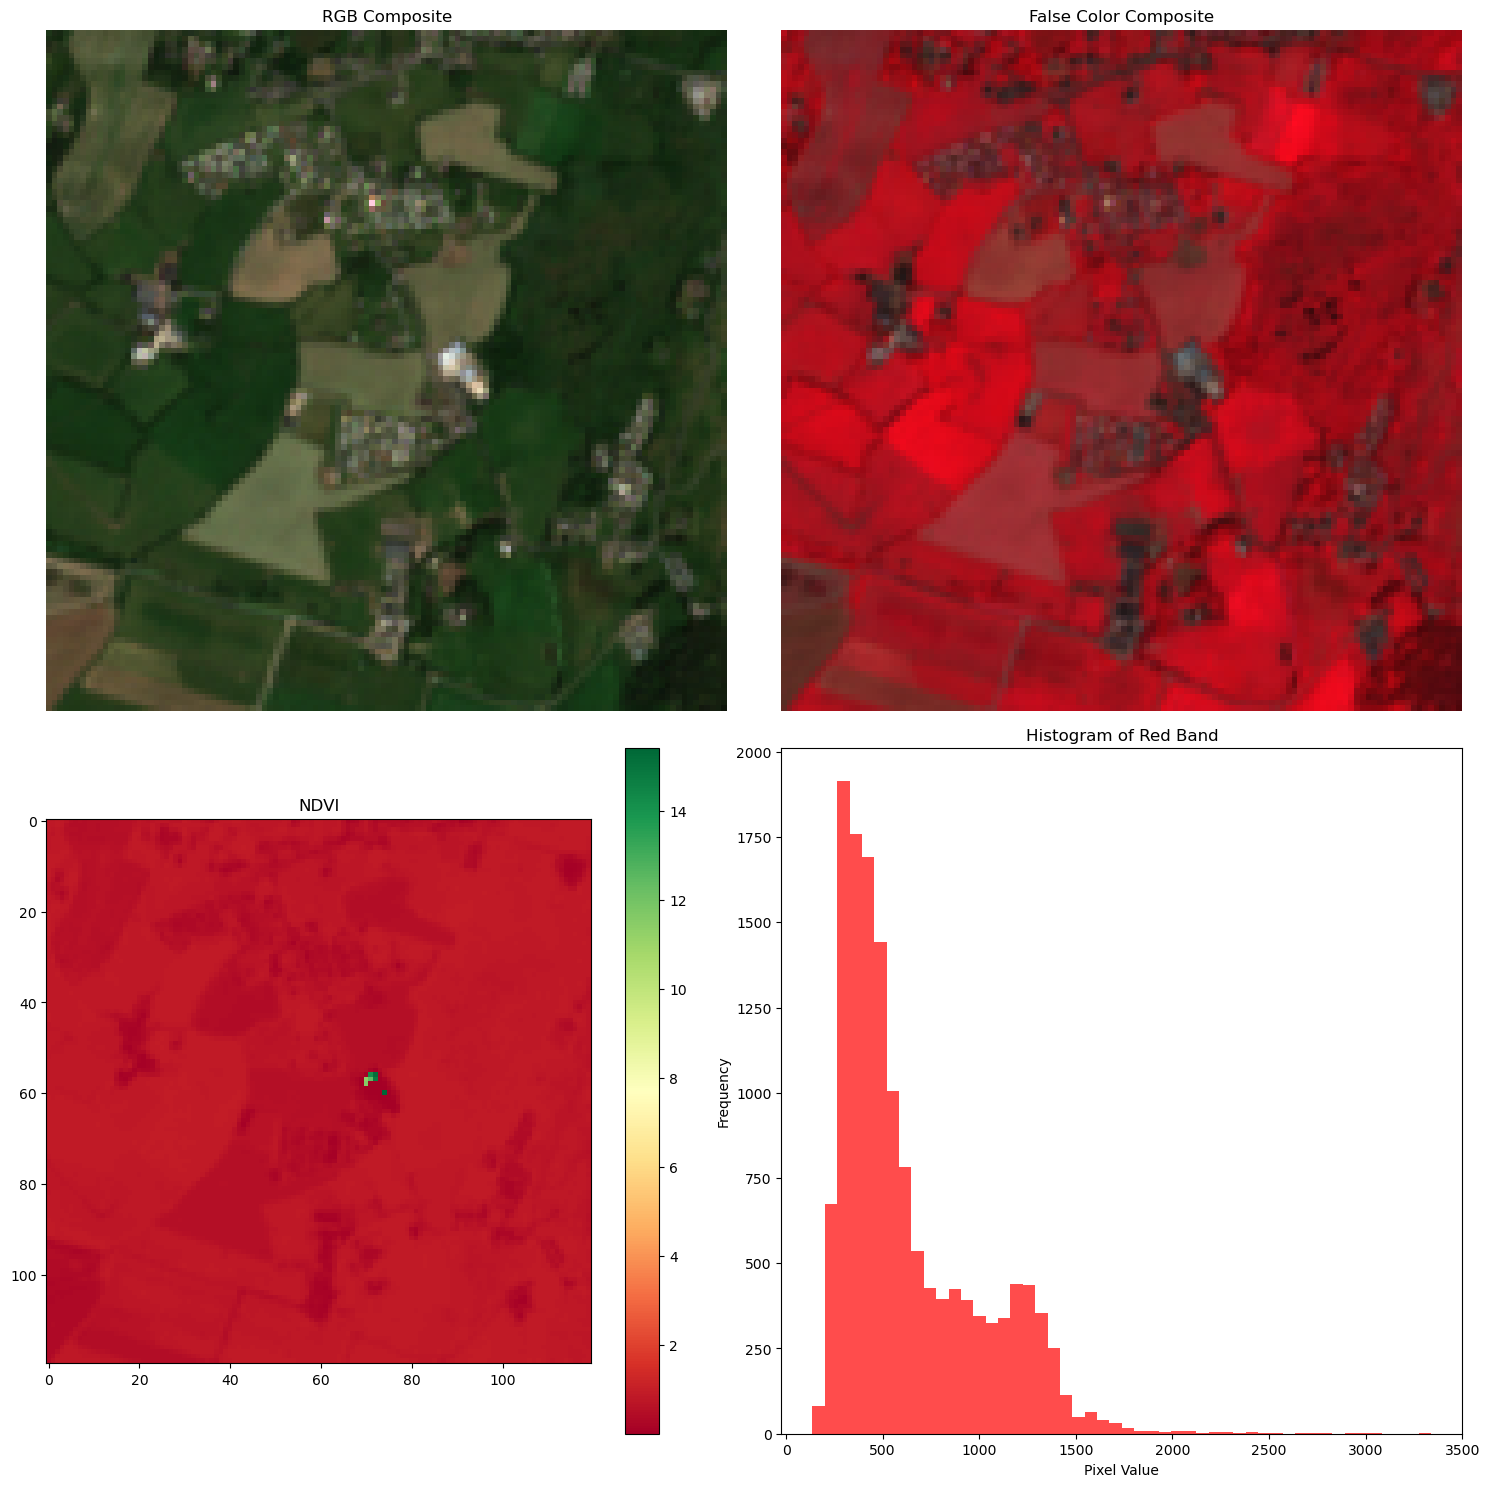

In [5]:
# File paths to the bands
band4_path = r'D:\datasets\2020-BigEarthNet-S2\BigEarthNetDataset\Beaches, dunes, sands\S2A_MSIL2A_20170617T113321_N9999_R080_T29UPU_65_77\S2A_MSIL2A_20170617T113321_N9999_R080_T29UPU_65_77_B04.tif'  # Red band
band3_path = r'D:\datasets\2020-BigEarthNet-S2\BigEarthNetDataset\Beaches, dunes, sands\S2A_MSIL2A_20170617T113321_N9999_R080_T29UPU_65_77\S2A_MSIL2A_20170617T113321_N9999_R080_T29UPU_65_77_B03.tif'
band2_path = r'D:\datasets\2020-BigEarthNet-S2\BigEarthNetDataset\Beaches, dunes, sands\S2A_MSIL2A_20170617T113321_N9999_R080_T29UPU_65_77\S2A_MSIL2A_20170617T113321_N9999_R080_T29UPU_65_77_B02.tif'
nir_path = r'D:\datasets\2020-BigEarthNet-S2\BigEarthNetDataset\Beaches, dunes, sands\S2A_MSIL2A_20170617T113321_N9999_R080_T29UPU_65_77\S2A_MSIL2A_20170617T113321_N9999_R080_T29UPU_65_77_B08.tif'  # NIR band

# Open the bands using Rasterio
with rasterio.open(band4_path) as band4, \
     rasterio.open(band3_path) as band3, \
     rasterio.open(band2_path) as band2, \
     rasterio.open(nir_path) as nir_band:
    
    red = band4.read(1)
    green = band3.read(1)
    blue = band2.read(1)
    nir = nir_band.read(1)
    
    # RGB Composite
    rgb = np.stack((red, green, blue), axis=-1)
    rgb = rgb / np.max(rgb)
    
    # False Color Composite (NIR, Red, Green)
    false_color = np.stack((nir, red, green), axis=-1)
    false_color = false_color / np.max(false_color)
    
    # NDVI
    ndvi = (nir - red) / (nir + red)
    
    # Display results
    plt.figure(figsize=(15, 15))

    plt.subplot(2, 2, 1)
    plt.imshow(rgb)
    plt.title("RGB Composite")
    plt.axis('off')

    plt.subplot(2, 2, 2)
    plt.imshow(false_color)
    plt.title("False Color Composite")
    plt.axis('off')

    plt.subplot(2, 2, 3)
    plt.imshow(ndvi, cmap='RdYlGn')
    plt.title("NDVI")
    plt.colorbar()

    plt.subplot(2, 2, 4)
    plt.hist(red.ravel(), bins=50, color='red', alpha=0.7)
    plt.title("Histogram of Red Band")
    plt.xlabel("Pixel Value")
    plt.ylabel("Frequency")

    plt.tight_layout()
    plt.show()


In [ ]:
# Define the patch_id you're interested in
target_patch_id = 'S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_90_87'  # Replace with your specific patch_id

# Filter the DataFrame to get the row with the matching patch_id
matching_row = metadata_df.loc[metadata_df['patch_id'] == target_patch_id]

# If a match is found, extract the labels
if not matching_row.empty:
    labels = matching_row['labels'].values[0]
    print(f'Labels for patch_id {target_patch_id}: {labels}')
else:
    print(f'No matching patch_id found for {target_patch_id}')


In [3]:
import pandas as pd
import numpy as np

# Read the data
metadata_df = pd.read_parquet(r'C:\Users\isaac\Desktop\SampleBigEarth\metadata.parquet')

# Convert numpy.ndarray to list if necessary
metadata_df['labels'] = metadata_df['labels'].apply(lambda x: x.tolist() if isinstance(x, np.ndarray) else x)

# Filter rows where 'labels' contain only "Arable land"
arable_land_only = metadata_df[metadata_df['labels'].apply(lambda x: x == ['Arable land'])]

# Count the number of such rows
num_arable_land_only = arable_land_only.shape[0]
print(f"Number of records with the label 'Arable land' uniquely: {num_arable_land_only}")

# Filter rows where 'labels' contain "Arable land" among other labels
arable_land_present = metadata_df[metadata_df['labels'].apply(lambda x: 'Arable land' in x and len(x) > 1)]

# Count the number of such rows
num_arable_land_present = arable_land_present.shape[0]
print(f"Number of records with 'Arable land' among other labels: {num_arable_land_present}")

# Define the target labels
target_labels = ['Arable land', 'Mixed forest', 'Coniferous forest']

# Filter rows where 'labels' contain exactly the target labels
exact_three_labels = metadata_df[metadata_df['labels'].apply(lambda x: sorted(x) == sorted(target_labels))]

# Count the number of such rows
num_exact_three_labels = exact_three_labels.shape[0]
print(f"Number of records with exactly the labels 'Arable land', 'Mixed forest', and 'Coniferous forest': {num_exact_three_labels}")


Number of records with the label 'Arable land' uniquely: 14893
Number of records with 'Arable land' among other labels: 173132
Number of records with exactly the labels 'Arable land', 'Mixed forest', and 'Coniferous forest': 3815
